# Name: Maxwell Bilyk
### Date: 8/13/2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 25.9 points per game  
- 2nd Team: 23.1 points per game  
- 3rd Team: 20.5 points per game  
- All-Star: 21.6 points per game   

**Question 2:** 3.7 Years  

**Question 3:** 

- Elite: 2 players.  
- All-Star: 1 players.  
- Starter: 11 players.  
- Rotation:9 players.  
- Roster: 14 players.  
- Out of League: 36 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.8%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [1]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("C:/Users/Max/Downloads/OKC Thunder Project/awards_data.csv")
player_data = pd.read_csv("C:/Users/Max/Downloads/OKC Thunder Project/player_stats.csv")
team_data = pd.read_csv("C:/Users/Max/Downloads/OKC Thunder Project/team_stats.csv")
rebounding_data = pd.read_csv("C:/Users/Max/Downloads/OKC Thunder Project/team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [2]:
player_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [3]:
awards.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
# Start by left joining the player stats and awards table on the unique identifier and the season number
player_stats_allnba = pd.merge(player_data, awards, on =['nbapersonid', 'season'], how = 'left')

player_stats_allnba.columns

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'season',
       'nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga',
       'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
       'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
       'blocks', 'tov', 'tot_fouls', 'points', 'PER', 'FTr', 'off_reb_pct',
       'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'All NBA Defensive First Team', 'All NBA Defensive Second Team',
       'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team',
       'All Rookie First Team', 'All Rookie Second Team',
       'Bill Russell NBA Finals MVP', 'Player Of The Month',
       'Player Of The Week', 'Rookie Of The Month', 'all_star_game',
       'rookie_all_star_game', 'allstar_rk', 'Defensive Player Of The Year_rk',
       'Most Improved Player_rk', 'Most Valuable Player_rk',
       'Rookie

In [5]:
# Since their are a lot of inconsistencies with the naming conventions of the columns, it makes sense to use Janitor to clean it up
import janitor

Q1_data = player_stats_allnba.clean_names()

In [6]:
# Now that all the columns are clean we can begin filtering
all_nba_1st = Q1_data[Q1_data.all_nba_first_team == 1]
all_nba_2nd = Q1_data[Q1_data.all_nba_second_team == 1]
all_nba_3rd = Q1_data[Q1_data.all_nba_third_team == 1]
all_star = Q1_data[Q1_data.all_star_game == True]

In [7]:
# Creating a column for points per game in all of the dataframes
all_nba_1st['ppg'] = (all_nba_1st['points'] / all_nba_1st['games'])
all_nba_2nd['ppg'] = (all_nba_2nd['points'] / all_nba_2nd['games'])
all_nba_3rd['ppg'] = (all_nba_3rd['points'] / all_nba_3rd['games'])
all_star['ppg'] = (all_star['points'] / all_star['games'])

C:\Users\Max\AppData\Local\Temp/ipykernel_20548/3844835606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nba_1st['ppg'] = (all_nba_1st['points'] / all_nba_1st['games'])
C:\Users\Max\AppData\Local\Temp/ipykernel_20548/3844835606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nba_2nd['ppg'] = (all_nba_2nd['points'] / all_nba_2nd['games'])
C:\Users\Max\AppData\Local\Temp/ipykernel_20548/3844835606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [8]:
# Print the average points per game for all subsets
print('1st team AVG PPG:',all_nba_1st['ppg'].mean(),'\n2nd team AVG PPG:',all_nba_2nd['ppg'].mean(),
     '\n3rd team AVG PPG:', all_nba_3rd['ppg'].mean(),'\nAll Star AVG PPG:',all_star['ppg'].mean())

1st team AVG PPG: 25.85244416863406 
2nd team AVG PPG: 23.081536669102267 
3rd team AVG PPG: 20.50349090652791 
All Star AVG PPG: 21.578781686653787


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 25.9 points per game  
2nd Team: 23.1 points per game  
3rd Team: 20.5 points per game  
All-Star: 21.6 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [9]:
# Filter dataset to players drafted in 2007 or later
Q2_data = Q1_data[Q1_data['draftyear'] >= 2007]

# Filter data again for any player that has made an All NBA Selection
all_nba = Q2_data[(Q2_data.all_nba_first_team == 1) | (Q2_data.all_nba_second_team == 1) | (Q2_data.all_nba_third_team == 1)]

In [10]:
# Group each player by their unique identifier and then pick out the lowest season number. The lowest season number will correspond to the first time that player made an All NBA Selection in their career
first_year = all_nba.groupby('nbapersonid')['season'].idxmin()

filtered_df = all_nba.loc[first_year]

# Create experience variable in dataset
filtered_df['experience'] = filtered_df['season'] - filtered_df['draftyear']

In [11]:
# Print average of experience variable
print('The AVG years of experience for a player to make their first all NBA selection is',filtered_df['experience'].mean())

The AVG years of experience for a player to make their first all NBA selection is 3.682926829268293


<strong><span style="color:red">ANSWER 2:</span></strong>  

3.7 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

### First step is to clean the dataframe and account for the shortened years

In [12]:
Q3_df = Q1_data

#Lockout Season
Q3_df.loc[Q3_df['season'] == 2011, ['games', 'mins','games_start']] *= (82/66)

#1st covid year
Q3_df.loc[Q3_df['season'] == 2019, ['games','mins','games_start']] *= (82/74) # slighly increased ratio so no players have over 82 games played

#2nd covid year
Q3_df.loc[Q3_df['season'] == 2020, ['games','mins','games_start']] *= (82/72)

round_columns = ['games','mins','games_start']

#rounding newly calculated columns
Q3_df[round_columns] = Q3_df[round_columns].round()

In [13]:
#Pull out players
unique_obs = Q3_df['nbapersonid'].unique()

#Loop to input years that are empty between their draft year and the 2021-2022 season
missing_years_data = []
for player in unique_obs:
    draft_year = Q3_df[Q3_df['nbapersonid'] == player]['draftyear'].iloc[0]
    for year in range(draft_year, 2021):
        if year not in Q3_df[Q3_df['nbapersonid'] == player]['season'].values:
            missing_years_data.append({'nbapersonid': player, 'draftyear': draft_year, 'season': year, 'mins': 0})

missing_years_df = pd.DataFrame(missing_years_data)

# Concatenate the new DataFrame with the original DataFrame
Q3_df = pd.concat([Q3_df, missing_years_df], ignore_index=True)

In [14]:
import numpy as np

# conditions for elite players
Elite_condition_1 = Q3_df['all_nba_first_team'] == 1
Elite_condition_2 = Q3_df['all_nba_second_team'] == 1
Elite_condition_3 = Q3_df['all_nba_third_team'] == 1
Elite_condition_4 = Q3_df['most_valuable_player_rk'] == 1
Elite_condition_5 = Q3_df['defensive_player_of_the_year_rk'] == 1

# giving player elite season status if all conditions are met
Q3_df['elite'] = np.where(Elite_condition_1 | Elite_condition_2 | Elite_condition_3 | Elite_condition_4 | Elite_condition_5, 1,0)

#same process as above for allstar
all_star_condition_1 = Q3_df['all_star_game'] == True
all_star_condition_2 = Q3_df['elite'] != 1

Q3_df['all_star'] = np.where(all_star_condition_1 & all_star_condition_2, 1,0)

#Same process as above for starters
starter_condition_1 = Q3_df['games_start'] >= 41
starter_condition_2 = Q3_df['mins'] >= 2000
starter_condition_3 = Q3_df['elite'] != 1
starter_condition_4 = Q3_df['all_star'] != 1

Q3_df['starter'] = np.where((starter_condition_1 | starter_condition_2) & (starter_condition_3 & starter_condition_4), 1,0)

#Same process as above for rotation players
rotation_condition_1 = Q3_df['mins'] >= 1000
rotation_condition_2 = Q3_df['elite'] != 1
rotation_condition_3 = Q3_df['all_star'] != 1
rotation_condition_4 = Q3_df['starter'] != 1

Q3_df['rotation'] = np.where(rotation_condition_1 & (rotation_condition_2 & rotation_condition_3 & rotation_condition_4), 1,0)

#same process as above for roster players
roster_condition_1 = Q3_df['mins'] >= 1
roster_condition_2 = Q3_df['elite'] != 1
roster_condition_3 = Q3_df['all_star'] != 1
roster_condition_4 = Q3_df['starter'] != 1
roster_condition_5 = Q3_df['rotation'] != 1

Q3_df['roster'] = np.where(roster_condition_1 & (roster_condition_2 & roster_condition_3 & roster_condition_4 & roster_condition_5), 1,0)

#since the only players with 0 mins in the df are the empty years added earlier, just need this one condition for out of leauge
ool_condition = Q3_df['mins'] == 0

Q3_df['ool'] = np.where(ool_condition, 1,0)

In [15]:
#group each player and order them by season
sorted_df = Q3_df.groupby('nbapersonid').apply(lambda group: group.sort_values(by='season')).reset_index(drop=True)

# Remove the first 4 years from each group
trimmed_df = sorted_df.groupby('nbapersonid').apply(lambda group: group.iloc[4:]).reset_index(drop=True)

In [16]:
#Pull out each players season outcomes and sum them all up
summed_df = trimmed_df.groupby('nbapersonid')[['elite', 'all_star','starter','rotation','roster','ool']].sum().reset_index()

#conditions to determine career outcome
co_conditions = [
    
    (summed_df['elite'] >=2),
    (summed_df['elite'] < 2) & (summed_df['all_star'] >=2),
    (summed_df['elite'] < 2) & (summed_df['all_star'] < 2) & (summed_df['starter'] >=2),
    (summed_df['elite'] < 2) & (summed_df['all_star'] < 2) & (summed_df['starter'] < 2) & (summed_df['rotation'] >= 2),
    (summed_df['elite'] < 2) & (summed_df['all_star'] < 2) & (summed_df['starter'] < 2) & (summed_df['rotation'] < 2) & (summed_df['roster'] >= 2),
    (summed_df['elite'] < 2) & (summed_df['all_star'] < 2) & (summed_df['starter'] < 2) & (summed_df['rotation'] < 2) & (summed_df['roster'] < 2) & (summed_df['ool'] >= 2)
]

categories = ['elite','all_star','starter','rotation','roster','ool']

summed_df['career_outcome'] = np.select(co_conditions, categories, default ='none')

#add career outcomes to original dataframe
merged_df = Q3_df.merge(summed_df[['nbapersonid','career_outcome']], on='nbapersonid', how = 'left')

#filter for 2010
new_df = merged_df[merged_df['draftyear'] == 2010]

#pull out the career outcome. the actual method won't matter since the career outcome is the same every year for a given player
class_2010 = new_df.groupby('nbapersonid')['career_outcome'].agg(pd.Series.mode).reset_index()

#print results
class_2010['career_outcome'].value_counts()

ool         36
roster      14
starter     11
rotation     9
elite        2
all_star     1
Name: career_outcome, dtype: int64

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 11 players.  
Rotation: 9 players.  
Roster: 14 players.  
Out of League: 36 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



### Overview

The following model is meant to predict the career outcome of any given player. 

The model works by using past data that includes player statistics and award winnings, in order to try and predict what that players career outcome will be. The possible career outcomes, from best to worst, are Elite, All-star, Starter, Rotation, Roster, Out of the Leauge, and No career outcome.

If this model was fine tuned, it could provide serious value to the orginization. Use cases include:
- Helping the front office focus in on free agents that have high predicted career outcomes
- Helping coaches and the front office to further evaulauate their own players in a data driven way

### Strengths and Weaknesses

A strength of this model is it's incorporation of a Random Forest Classifier. Random Forest models are some of the best newly developed models in terms of predictive power. The foundation for this model is absolutley their and if fine tuned, could be very useful.

A couple of weaknesses:

After looking and thinking about why the model was performing sub-par I came to a realization about possible leakage in my model. To explain further, I had inputed a career outcome variable for every single player. So if a player had 10 seasons worth of data, I added a new column that had the same career outcome in each of those seasons. At first I overlooked this as being an issue but then I thought about how the model was learning from some of these players and how it could seriously be thrown off. To explain more clearly I'll bring up an example like Jimmy Butler. Butler has a career outcome of Elite. This is even the case in his first two years in the leauge when he averaged less than 9 points per game in each of those seasons. So this model is seeing those years where he performed poorly, but is being told to label him as Elite. I'm sure their a lot of examples of this within the data which is leading to my 'leakage' problem and most likely dragging the accuracy of this model down.

### Fixes and Improvements

The first fix I would make to this model would be to directly fix the problem stated above. To do this, it would make more sense for me to be grouping players and summing or averaging up the values in each column. This would be quite time consuming since my final dataset for the model had 77 columns that would all need to be looked at seperatley on how to aggregrate them, but this proccess would surely help me to rid of that leakage problem.

An improvement I would make with more time would be to create an voting classifier that uses multiple different classifier models and then averages out the results from each to make the best predictions. Wisdom of the crowd!

### Code and Vizualization

In [17]:
from sklearn.model_selection import train_test_split

model_data = merged_df

# drop na's
clean_data = model_data.dropna(subset=['player'])

# player name and team wont help in predictions so don't need it in the data
clean_data.drop(columns=['player','team'], inplace = True)

C:\Users\Max\AppData\Local\Temp/ipykernel_20548/1150582093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['player','team'], inplace = True)


In [18]:
# pulling out columns we need to have clean to have value of 0
columns_to_zero = ['all_nba_defensive_first_team',
       'all_nba_defensive_second_team', 'all_nba_first_team',
       'all_nba_second_team', 'all_nba_third_team', 'all_rookie_first_team',
       'all_rookie_second_team', 'bill_russell_nba_finals_mvp',
       'player_of_the_month', 'player_of_the_week', 'rookie_of_the_month','fgp','fgp3','fgp2', 'ftp','ftr', 'tov_pct','efg']

clean_data[columns_to_zero] = clean_data[columns_to_zero].fillna(0)

# making na draft pick's 61, since we can consider this variable as ordinal so 61 meaning undrafted
clean_data['draftpick'] = clean_data['draftpick'].fillna(61)

# columns for boolean values
columns_to_false = ['all_star_game','rookie_all_star_game'] 

clean_data[columns_to_false] = clean_data[columns_to_false].fillna(False)

# Once again ordinal variables so making na's 200
columns_to_200 = ['allstar_rk',
       'defensive_player_of_the_year_rk', 'most_improved_player_rk',
       'most_valuable_player_rk', 'rookie_of_the_year_rk',
       'sixth_man_of_the_year_rk', 'all_nba_points_rk', 'all_rookie_points_rk']

clean_data[columns_to_200] = clean_data[columns_to_200].fillna(200)

# If the player didn't meet any of the criteria
clean_data['career_outcome'] = clean_data['career_outcome'].fillna('none')

C:\Users\Max\AppData\Local\Temp/ipykernel_20548/2752494441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[columns_to_zero] = clean_data[columns_to_zero].fillna(0)
C:\Users\Max\AppData\Local\Temp/ipykernel_20548/2752494441.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['draftpick'] = clean_data['draftpick'].fillna(61)
C:\Users\Max\AppData\Local\Temp/ipykernel_20548/2752494441.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [19]:
# Filtering data for training and testing
training_data = clean_data[clean_data['draftyear'] <= 2015]
testing_data = clean_data[clean_data['draftyear'] >= 2018]

X = training_data.drop(columns=['career_outcome'])
y = training_data['career_outcome']

# Train and Test split, want 80% to train since data sample is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_predict = testing_data.drop(columns=['career_outcome'])
y_predict = testing_data['career_outcome']

# Checking class balances
y.value_counts()

starter     2556
roster      1612
rotation    1154
ool          851
elite        419
all_star     266
none          51
Name: career_outcome, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


clf = RandomForestClassifier(max_depth=None,random_state=42)

# Fitting Random Forest Classifier
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

# Print accuracy
accuracy_score(y_test,predictions)

0.5839363241678727

The accuracy score above is not super high, but accuracy can be a harsh metric when looking at classifiers with a lot of class options in the target variable.

Additionally, accuracy is also not an ideal metric when predicted imbalanced classes, which is the case here.

C:\Users\Max\anaconda3\lib\site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", _cmap_r)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
C:\Users\Max\anaconda3\lib\site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecat

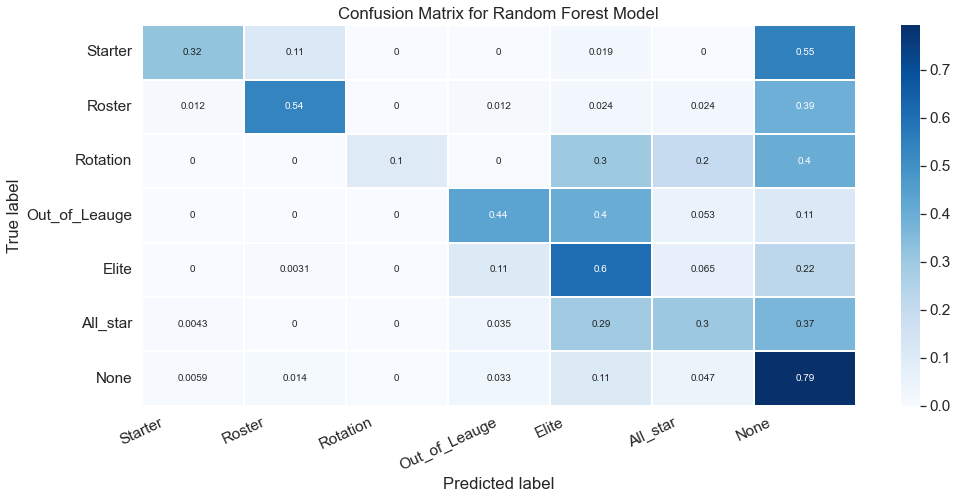

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Starter', 'Roster', 'Rotation', 
               'Out_of_Leauge', 'Elite', 'All_star',    
               'None']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show();

This plot is awesome in helping us see how our model is predicting across the different possible classes of career outcomes.
- The model is struglling the most with predicting Starters, Rotation and All-star players
- The model performs very accuratley at predicting players with no career outcome and does a decent job at predicting Roster and Elite players

A big standout is that the model is predicting "No career outcome" much too often.

In [45]:
#Print more metric measures to further understand model performance
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    all_star       0.77      0.32      0.45        53
       elite       0.76      0.54      0.63        84
        none       1.00      0.10      0.18        10
         ool       0.55      0.44      0.49       170
      roster       0.50      0.60      0.55       323
    rotation       0.55      0.30      0.39       231
     starter       0.63      0.79      0.70       511

    accuracy                           0.58      1382
   macro avg       0.68      0.44      0.48      1382
weighted avg       0.59      0.58      0.57      1382



For most classes, the highest score is the precision score, meaning the model was careful to label things a certain class if they weren't.

Inversely, the recall score is one of the lower scores for each class, telling us that our model is being too careful when making it's classifications.

The recall and f1 score for players with no career outcome is extremley low, supporting the claim above that our model is struggling very hard with this prediction, which can most likely be attributed to the class imbalances.

# Player Predictions

### Shai Gilgeous-Alexander

In [23]:
clf.predict(X_predict[X_predict['nbapersonid'] == 1628983])

array(['starter', 'starter', 'elite', 'all_star'], dtype=object)

This model predicts Shai's career outcome to be All-star.

### Zion Williamson

In [24]:
clf.predict(X_predict[X_predict['nbapersonid'] == 1629627])

array(['roster', 'elite'], dtype=object)

The model predicts Zion's career outcome to be a roster player.

### James Wiseman

In [25]:
clf.predict(X_predict[X_predict['nbapersonid'] == 1630169])

array(['rotation', 'rotation', 'starter'], dtype=object)

The model predicts James's career outcome to be a rotation player.

### Josh Giddey

In [26]:
clf.predict(X_predict[X_predict['nbapersonid'] == 1630581])

array(['starter'], dtype=object)

The model predicts Josh's career outcome to be a starter.

### HTML Table

In [77]:
# Filter data to only have players drafted 2019 and on
table_data = clean_data[clean_data['draftyear'] >= 2019]

X_table = table_data.drop(columns=['career_outcome'])
y_table = table_data['career_outcome']

# Predict career_outcome
table_predictions = clf.predict(X_table)

# Make predictions new column in dataframe
X_table['predicted_outcome'] = table_predictions

# Filtering
new_columns = ['nbapersonid','season','predicted_outcome']

new_table = X_table[new_columns]

# Joining tables in order to bring player names back into the data
merged_df = new_table.merge(player_data[['nbapersonid','player']],on='nbapersonid')

# group by player and take the mode of career outcomes predicted for each player
html_table = merged_df.groupby('player')['predicted_outcome'].agg(pd.Series.mode).reset_index()

html_table.to_html(index=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>player</th>\n      <th>predicted_outcome</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Aaron Henry</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Aaron Nesmith</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Aaron Wiggins</td>\n      <td>starter</td>\n    </tr>\n    <tr>\n      <td>Adam Mokoka</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Ade Murkey</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Admiral Schofield</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Ahmad Caver</td>\n      <td>ool</td>\n    </tr>\n    <tr>\n      <td>Aleem Ford</td>\n      <td>ool</td>\n    </tr>\n    <tr>\n      <td>Aleksej Pokusevski</td>\n      <td>rotation</td>\n    </tr>\n    <tr>\n      <td>Alen Smailagic</td>\n      <td>roster</td>\n    </tr>\n    <tr>\n      <td>Alperen Şengun</td>\n      <td>starter</td>\n    </tr>\n    <tr>\n 

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [44]:
# Filter data for just OKC instances
okc_rebounding = rebounding_data[rebounding_data['team'] == 'OKC']

#Filter data to only grab games 1-80
games_1_to_80 = okc_rebounding[(okc_rebounding['game_number'] >=1) & (okc_rebounding['game_number'] <= 80)]

#average offensive rebounding percentage
games_1_to_80['oreb_pct'].mean()

0.2878860611061612

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.8% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  

One possible apporoach to this problem could be to to look at each individual player's offensive rebounding percentage. A dataset that had this information would make it possible to predict a more accurate team offensive rebounding percentage. Whenever the team found out the lineup for a given game, they could just average each player in the lineup's offensive rebounding percentage together in order to come up with a more accurate prediction. This would proactivley account for missing great offensive rebounders for the team.

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  

A weakness with this model that I want to discuss is the lack of predictive power that the model above yields. While a simple average can support a decent baseline prediction, the use of a regression model could potentially signifigantly increase prediction accuracy.

To speak on the methodology I would take for this approach, I would first off want to pull in more data to help paint the picture of each game a little better. For example, data like opposing team defensive rebounding percentage, opposing team shots attempted per game, opposing team field goal percentage. Using this data in combination with game number and a similiar work-around for player injury as stated above in question 2, could be a much more accurate model than the simple average model.